## Dataset: Thera Bank Personal Loan Campaign


### Data Description

### Domain

### Objective

## 1. Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. (5 marks)

#### - Importing necessary libraries

In [329]:
# Importing necessary libraries
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [330]:
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

#### - Import dataset and initial study

In [331]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")


In [332]:
## check for non numeric character
data[~data.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [333]:
## 5000 rows and 14 columns
data.shape

(5000, 14)

In [335]:
## column names
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [336]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### - Check datatypes

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


 #### - Descriptive stats about the data

In [338]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### - Find null


In [342]:
## No null data
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Columns, dataypes, contains Null and unqiue Count

In [343]:
listl = []
for col in data.columns :
    listl.append([col,data[col].dtype,
                     data[col].isna().sum(),
                     round((data[col].isna().sum()/len(data[col])) * 100,2),
                      data[col].nunique()]);

DataDesc = pd.DataFrame(columns=['Columns', 'DataType', 'IsNull', 'Null%', 'UniqueCount'],
                     data=listl)
DataDesc

,Columns,DataType,IsNull,Null%,UniqueCount
0,ID,int64,0,0.0,5000
1,Age,int64,0,0.0,45
2,Experience,int64,0,0.0,47
3,Income,int64,0,0.0,162
4,ZIP Code,int64,0,0.0,467
5,Family,int64,0,0.0,4
6,CCAvg,float64,0,0.0,108
7,Education,int64,0,0.0,3
8,Mortgage,int64,0,0.0,347
9,Personal Loan,int64,0,0.0,2


# 2. EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings

In [345]:
# dropping unecessary columns: ID and ZIP Code which does not add value
data1 =data.drop(['ID','ZIP Code'], axis =1 ) 
data1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


#### - Number of unique in each column?

In [344]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### - Numberof people with zero mortgage?

In [347]:
data1['Mortgage'].value_counts(normalize = True)

0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64

In [348]:
data1['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

#### - Number of people with zero credit card spending per month?

In [349]:
data1['CreditCard'].value_counts(normalize = True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [350]:
data1['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

#### - Univariate Analysis

In [351]:
data1.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

#### - Value counts of all categorical columns

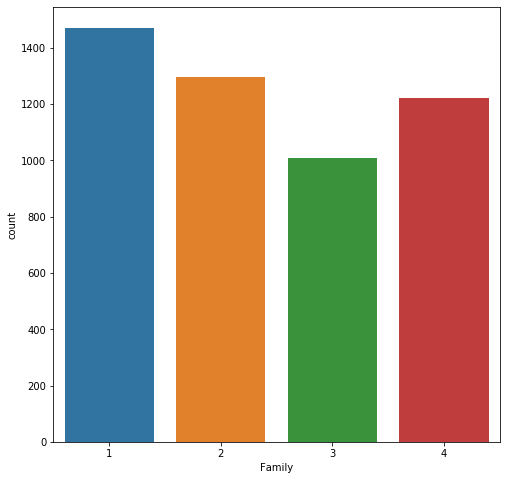

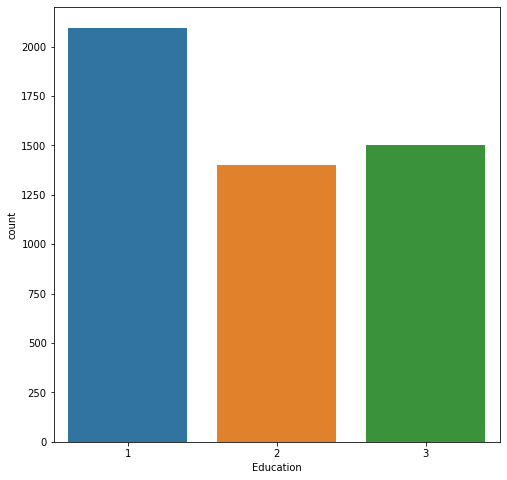

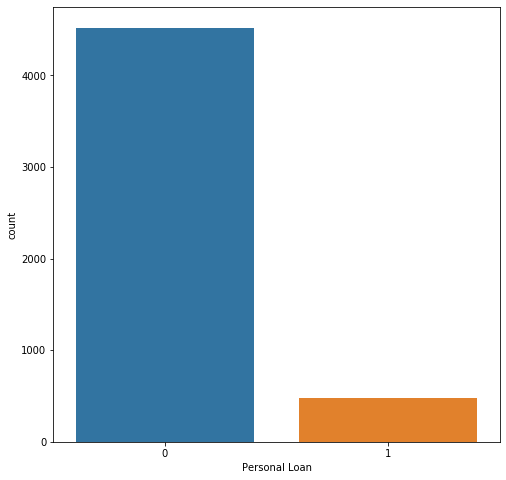

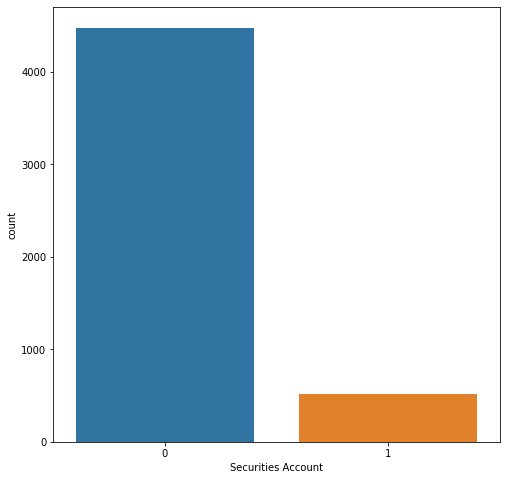

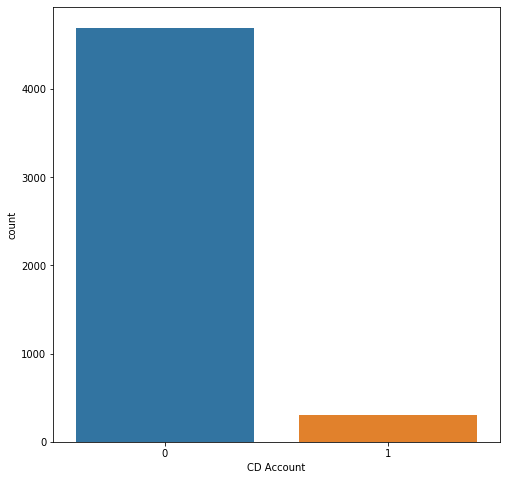

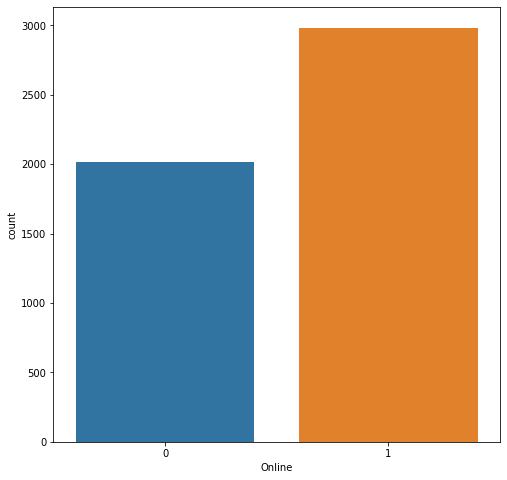

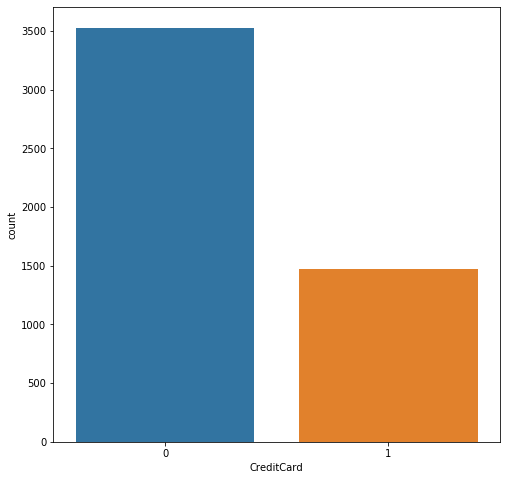

In [354]:
cat=['Family', 'Education', 'Personal Loan', 'Securities Account','CD Account', 'Online', 'CreditCard']
for i in cat:
    f,(ax1) =plt.subplots(1, figsize=(8,8))
    sns.countplot(data[i])

In [355]:
cat=['Family', 'Education', 'Personal Loan', 'Securities Account','CD Account', 'Online', 'CreditCard']
for i in cat:
    
    print (data1[i].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


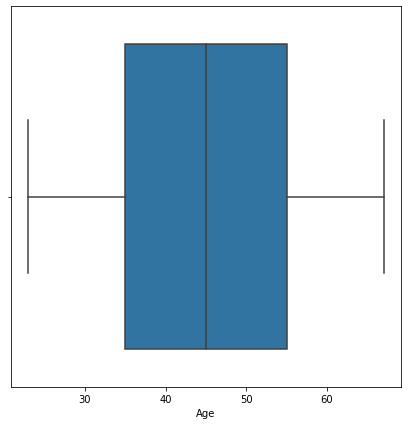

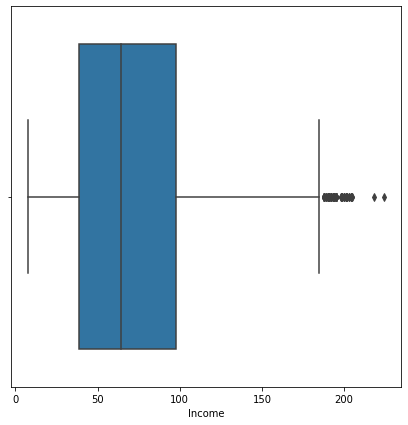

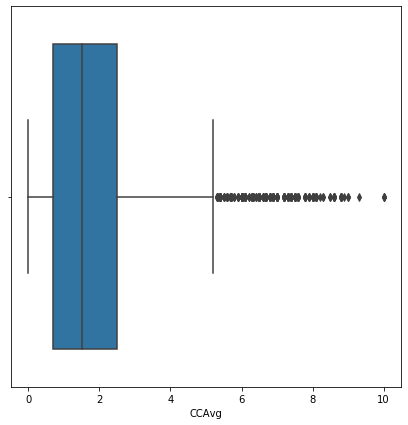

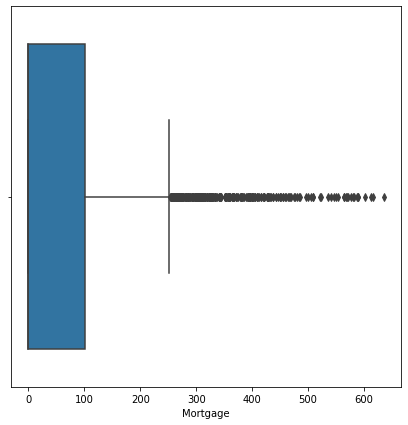

In [356]:

columns = ['Age','Income','CCAvg','Mortgage']

for col in columns:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.boxplot(data1[col])

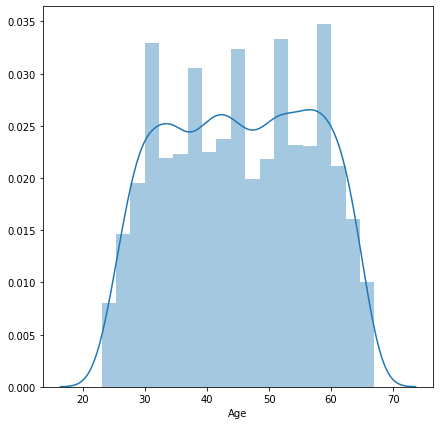

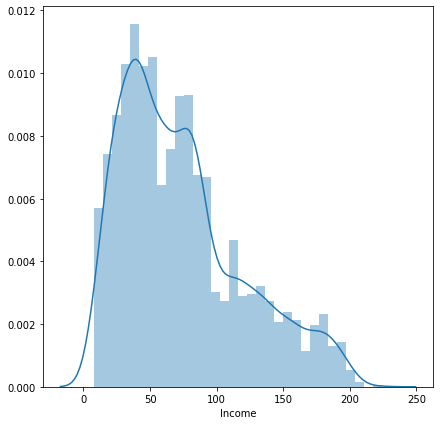

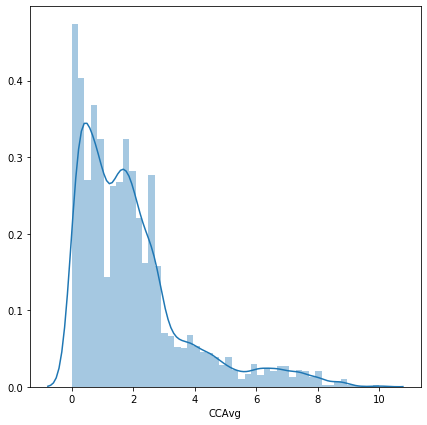

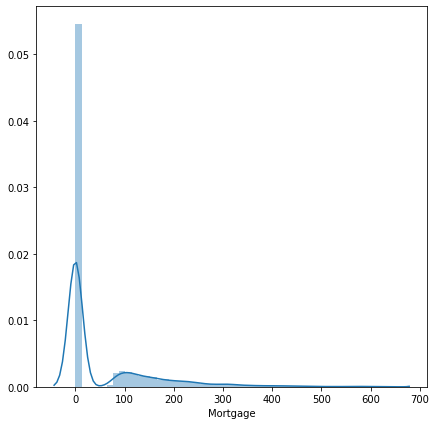

In [357]:
columns = ['Age','Income','CCAvg','Mortgage']

for col in columns:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.distplot(data1[col])
         
        

#### Skewness

In [358]:
data.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

#### - Bivariate Analysis

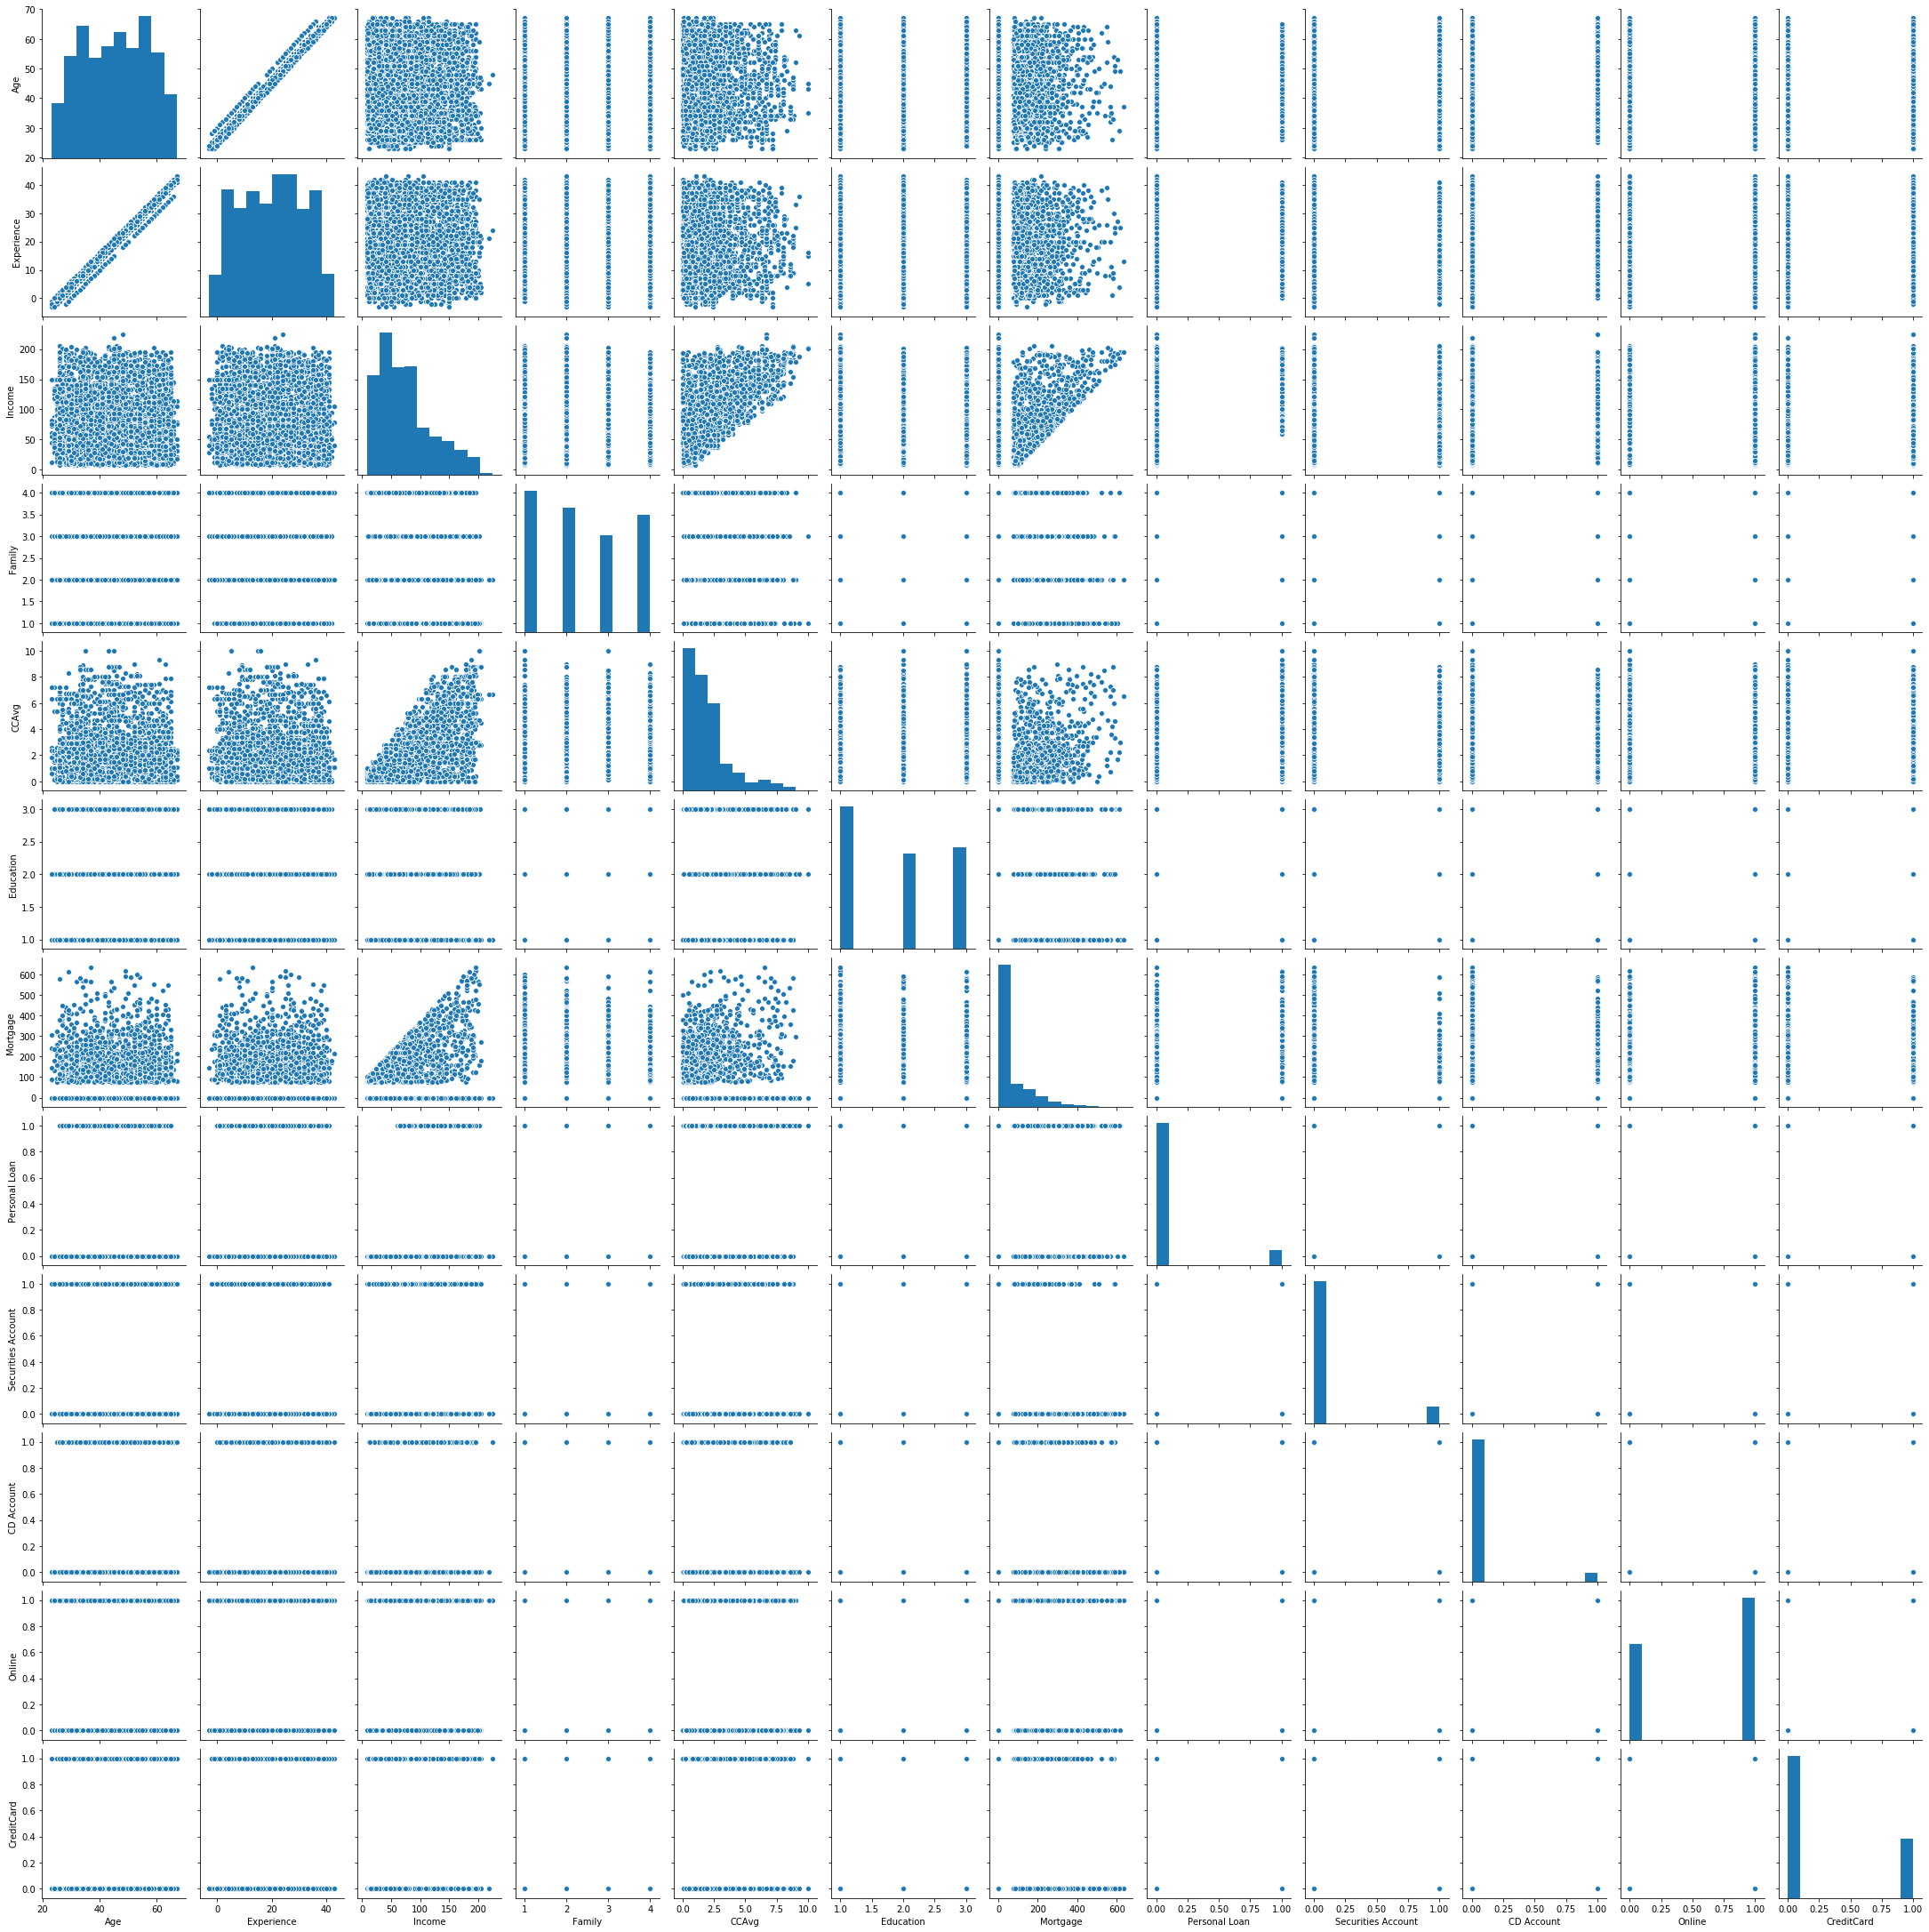

In [359]:
sns.pairplot(data1)

In [360]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=21):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

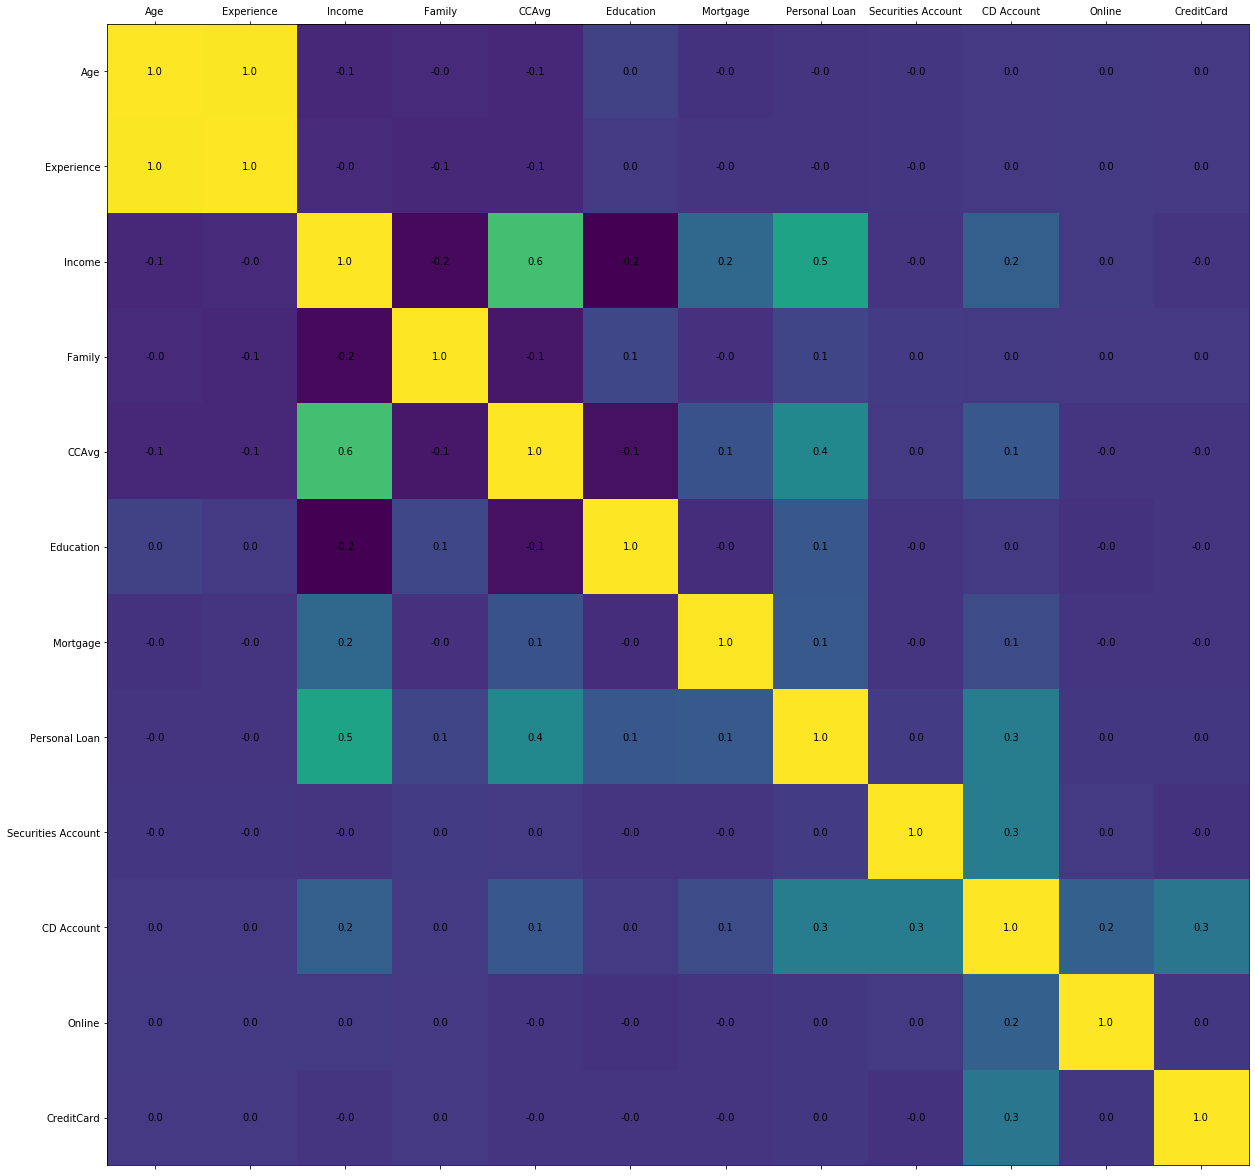

In [361]:
plot_corr(data1)

##### Experiance and Age is highly correlated 

In [363]:
## Incorrect value imputation (replace by median)
data1['Experience'].replace([-1,-2,-3], 20,inplace=True)

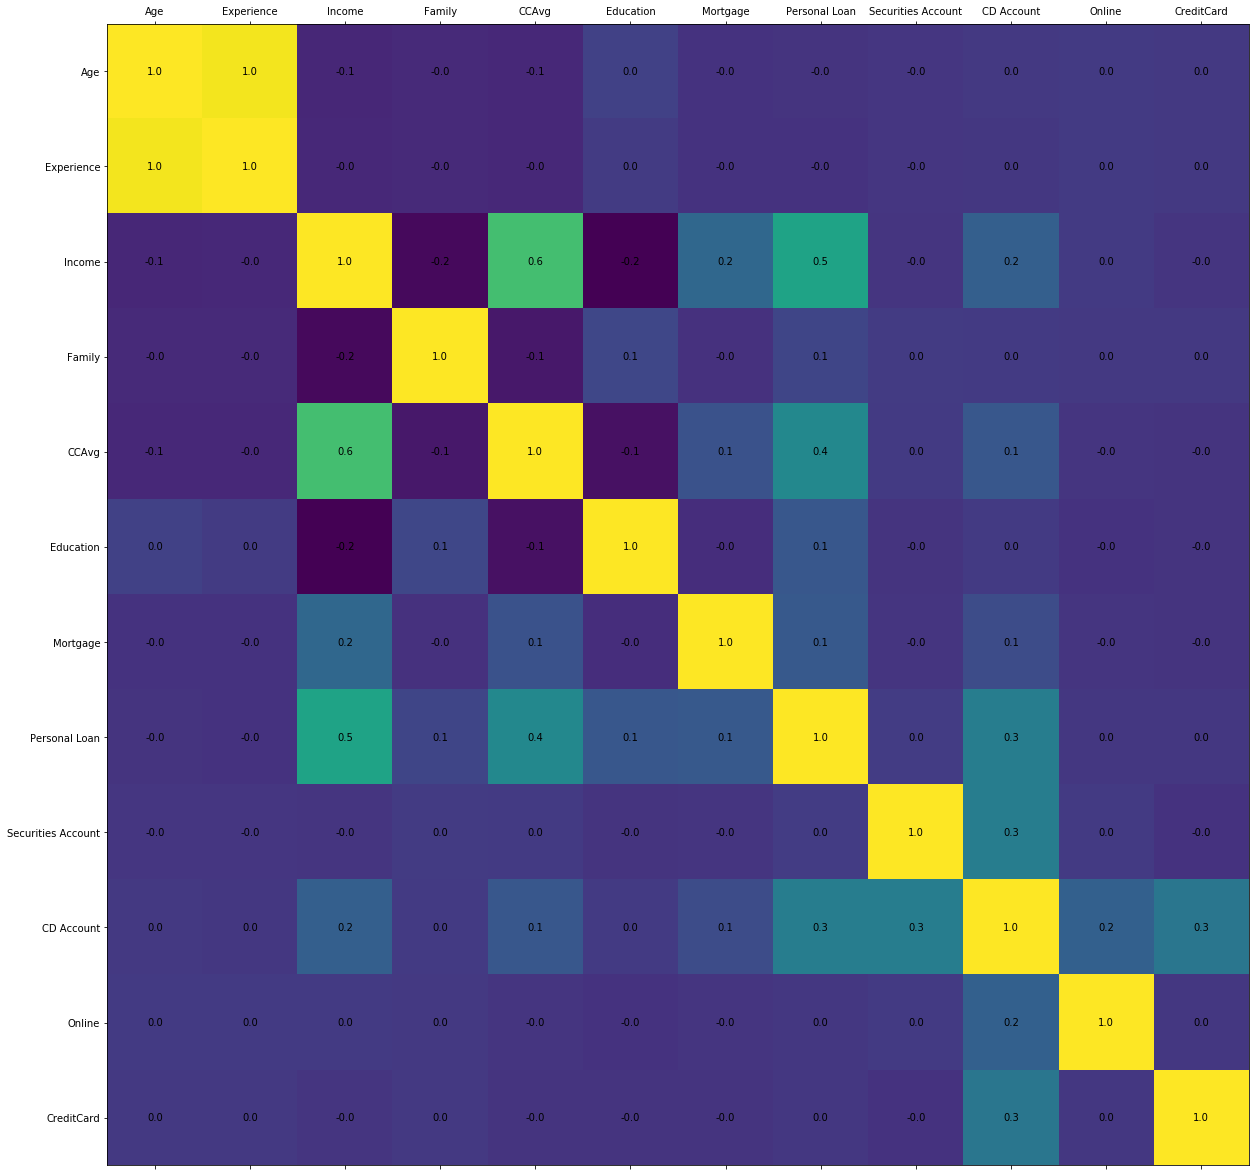

In [364]:
plot_corr(data1)
## Still Age and Experience is highly correlated droping Experience as  variation in output can explained by anyone of it 

In [365]:
##Still Experience and Age is highly correlated  droping experience 
data1 = data1.drop('Experience', axis=1)

### Data preparation for the model

#### - Income Outlier Treatment

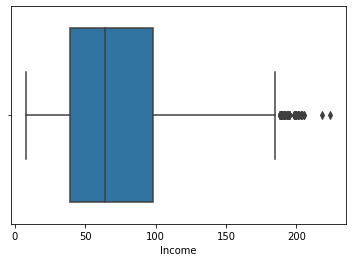

In [366]:
sns.boxplot(data1['Income'])

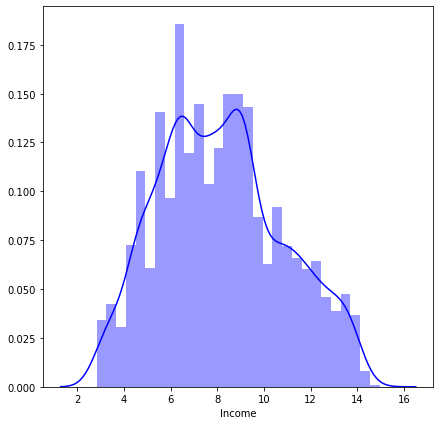

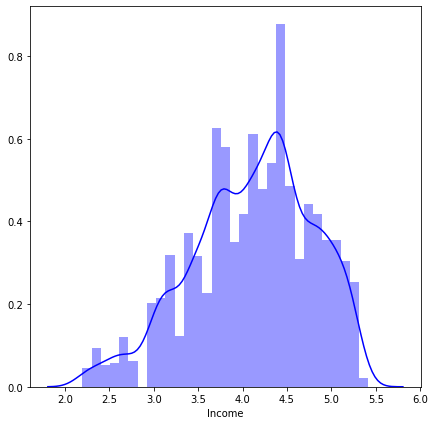

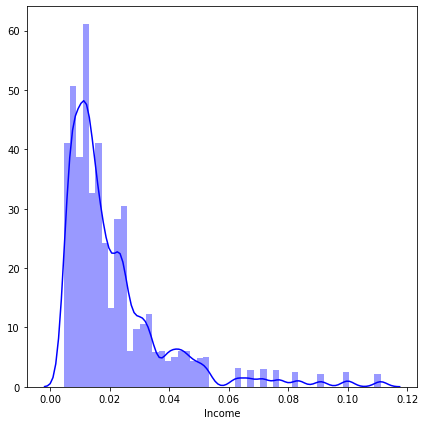

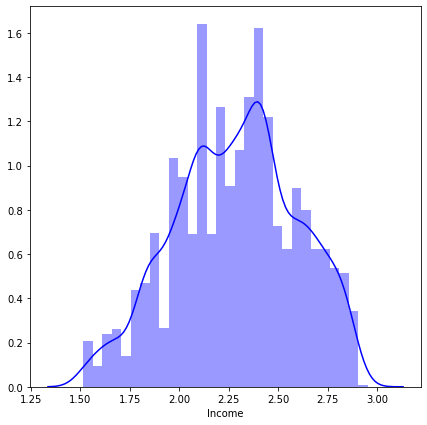

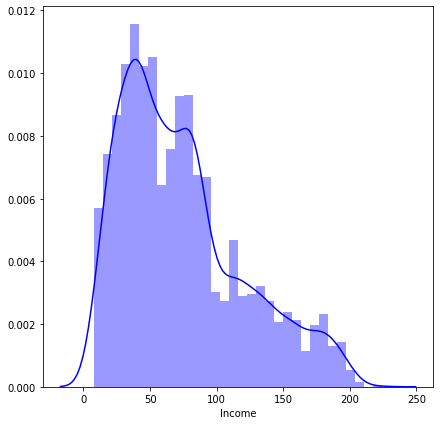

In [367]:
Income_Log =np.log(data1['Income'] +1)
Income_Inverse =1/(data1['Income'] +1)
Income_root =data1['Income']**(1/2)
Income_exp =data1['Income'] **(1/5)
Income= data1['Income']
cat=[Income_root,Income_Log,Income_Inverse,Income_exp,Income]
for i in cat:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.distplot(i, color ="b")
##Income little bit right skewed 
##Income_Inverse more right skewed
##Income_root looks better
##Income_exp less than root
##Income_log left skewed

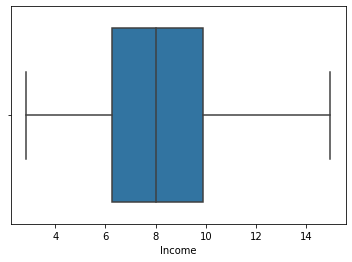

In [368]:
sns.boxplot(Income_root)

#### - Mortgage Outlier Treatment

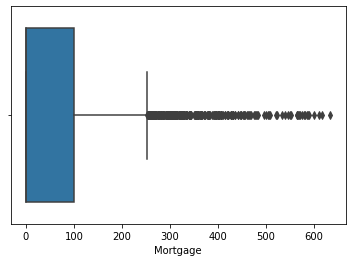

In [369]:
sns.boxplot(data1['Mortgage'])

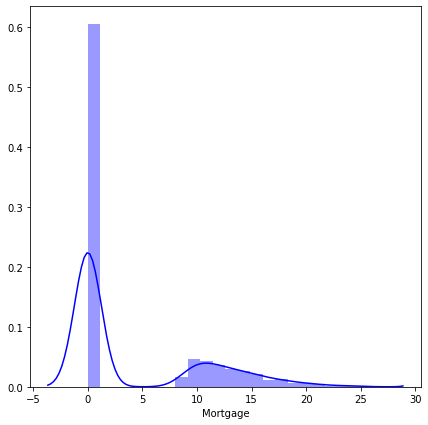

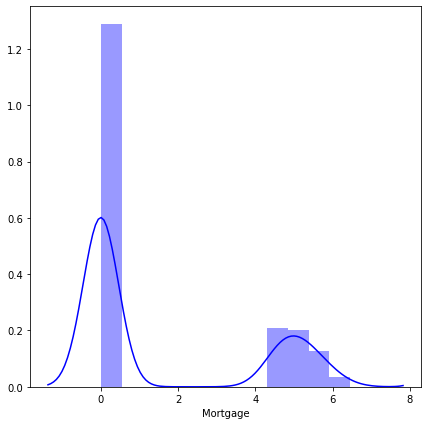

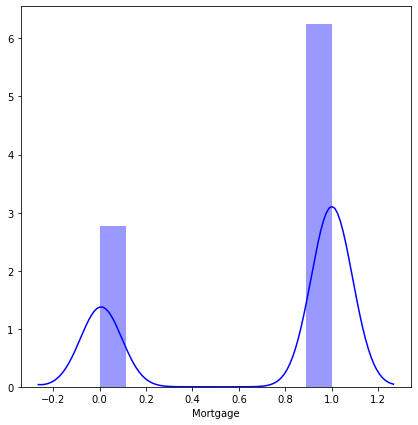

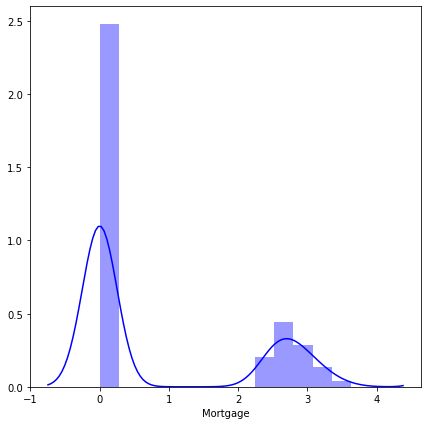

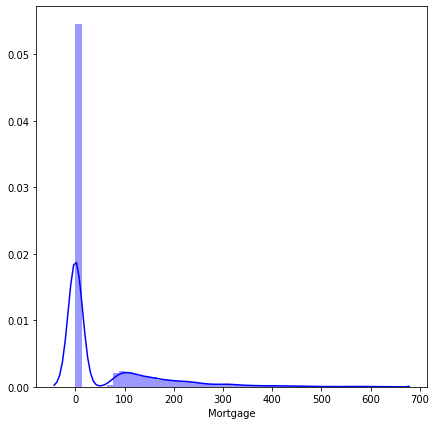

In [370]:
Mortgage_Log =np.log(data1['Mortgage'] +1)
Mortgage_Inverse =1/(data1['Mortgage'] +1)
Mortgage_root =data1['Mortgage']**(1/2)
Mortgage_exp =data1['Mortgage'] **(1/5)
Mortgage= data1['Mortgage']
cat=[Mortgage_root,Mortgage_Log,Mortgage_Inverse,Mortgage_exp,Mortgage]
for i in cat:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.distplot(i, color ="b")


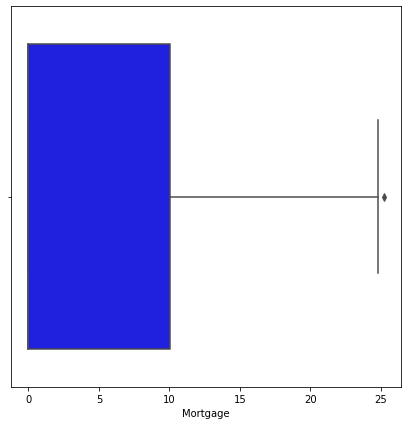

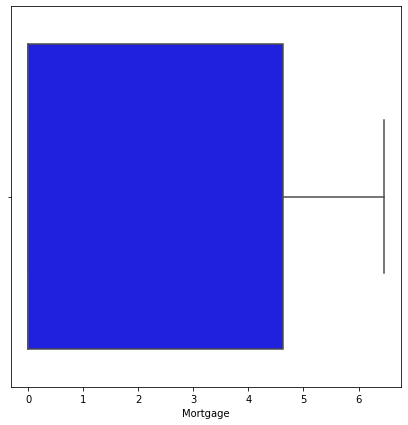

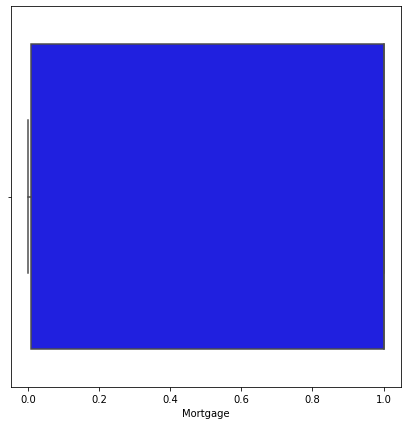

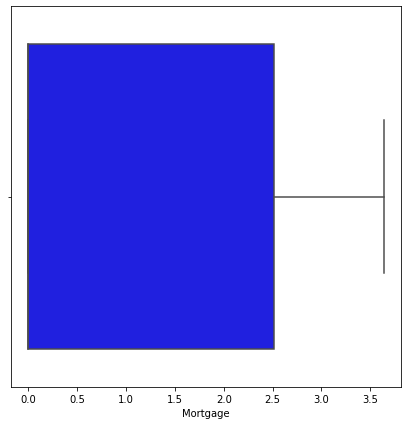

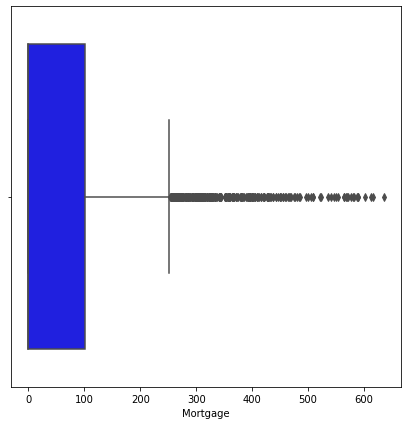

In [371]:
cat=[Mortgage_root,Mortgage_Log,Mortgage_Inverse,Mortgage_exp,Mortgage]
for i in cat:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.boxplot(i, color ="b")

#### -  CC Avg Outlier Treatment

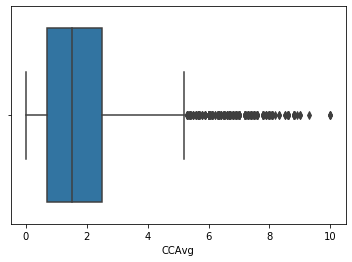

In [372]:
sns.boxplot(data1['CCAvg'])

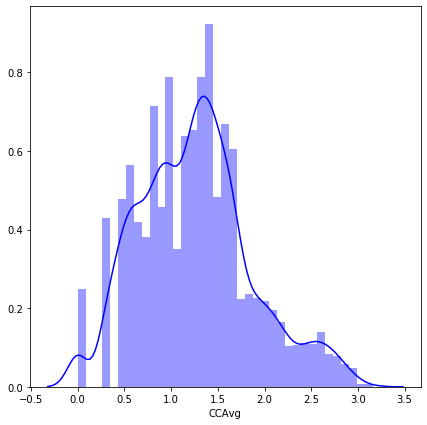

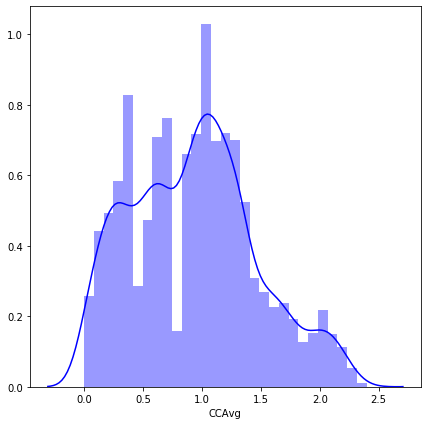

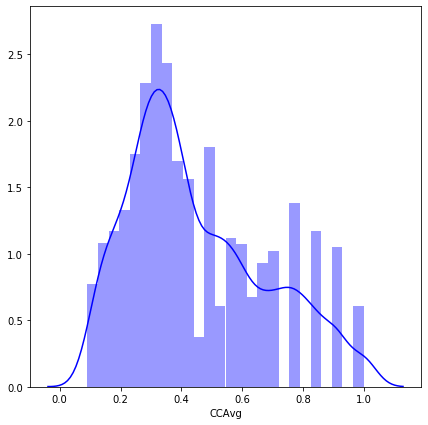

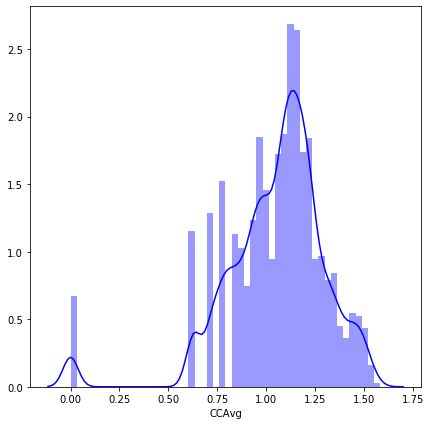

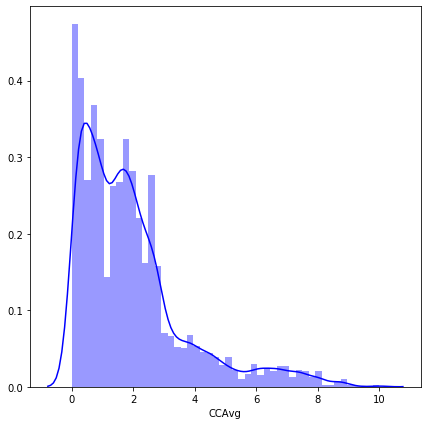

In [373]:
CC_Log =np.log(data1['CCAvg'] +1)
CC_Inverse =1/(data1['CCAvg'] +1)
CC_root =data1['CCAvg']**(1/2)
CC_exp =data1['CCAvg'] **(1/5)
CC= data1['CCAvg']
cat=[CC_root,CC_Log,CC_Inverse,CC_exp,CC]
for i in cat:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.distplot(i, color ="b")

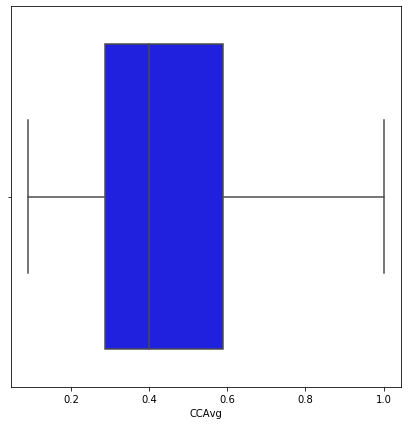

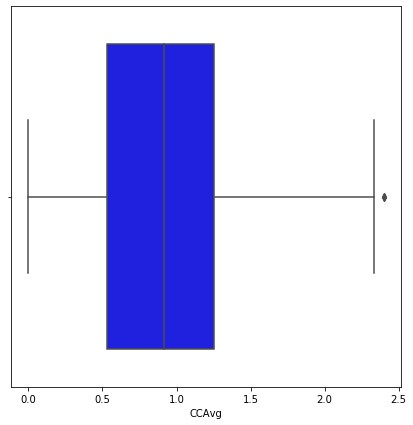

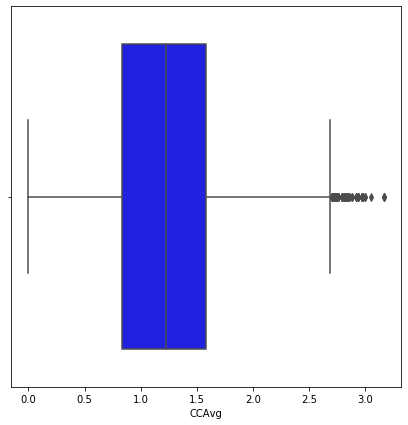

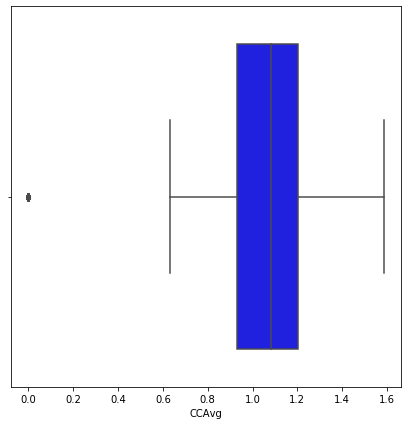

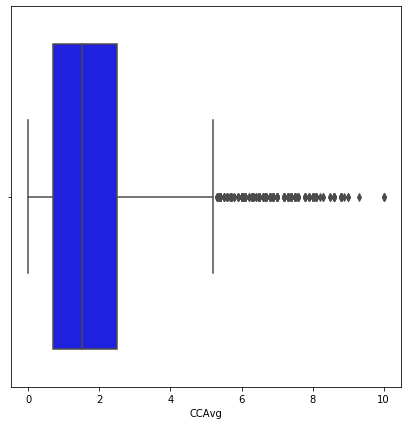

In [374]:
CC_Log =np.log(data1['CCAvg'] +1)
CC_Inverse =1/(data1['CCAvg'] +1)
CC_root =data1['CCAvg']**(1/2)
CC_exp =data1['CCAvg'] **(1/5)
CC= data1['CCAvg']
cat=[CC_Inverse,CC_Log,CC_root,CC_exp,CC]
for i in cat:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.boxplot(i, color ="b")

In [375]:
data1['Income_root']=Income_root
data1['Mortgage_Log']=Mortgage_Log
data1['CC_inverse']=CC_Inverse

## Analysis of target variable with repect to other categorical variable

In [376]:
def barplot(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

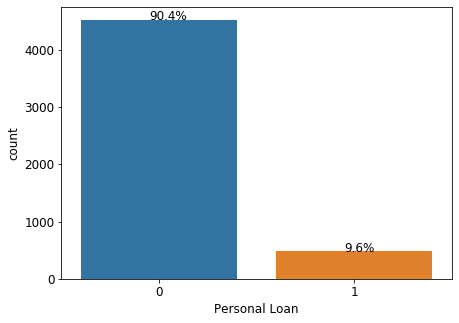

In [377]:
plt.figure(figsize=(7,5))
ax=sns.countplot('Personal Loan',data=data)
plt.xticks(size=12)
plt.xlabel('Personal Loan',size=12)
plt.yticks(size=12)
plt.ylabel('count',size=12)
barplot(ax,data['Personal Loan'])

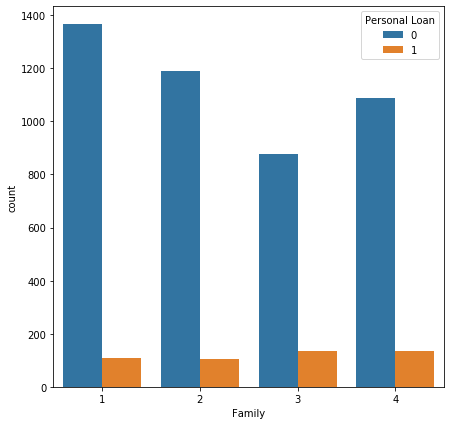

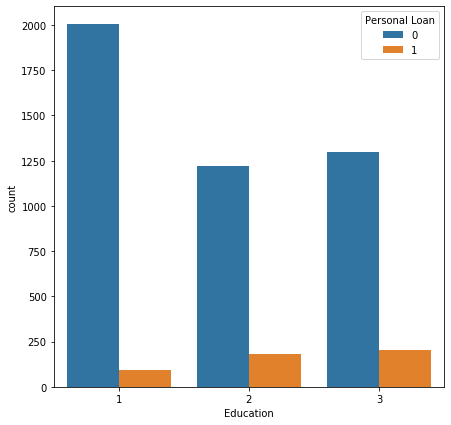

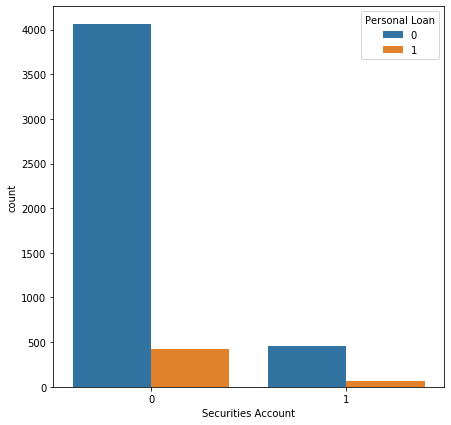

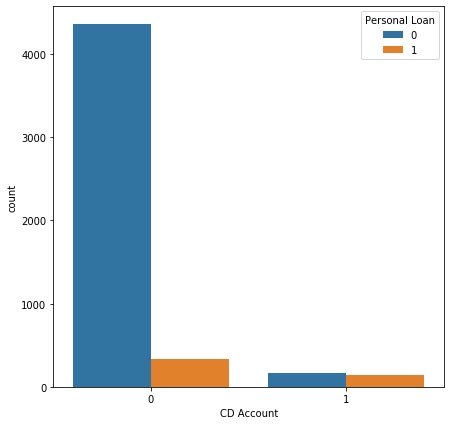

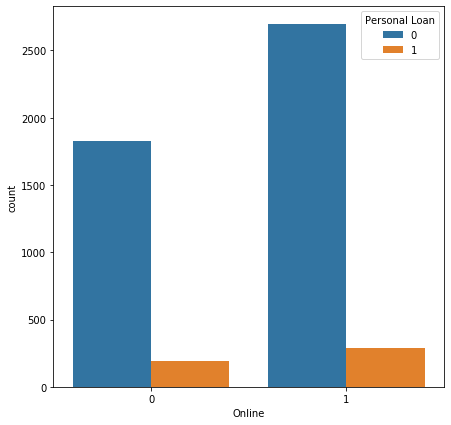

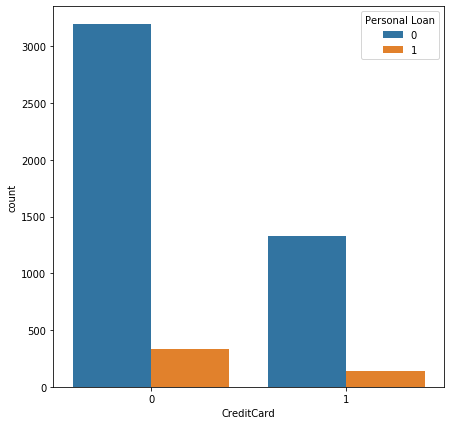

In [378]:

cat=['Family', 
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']
for i in cat:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.countplot(x=i,data=data1,hue=data1['Personal Loan'])
        

Text(0.5, 1.0, 'Education and Income Boxplot')

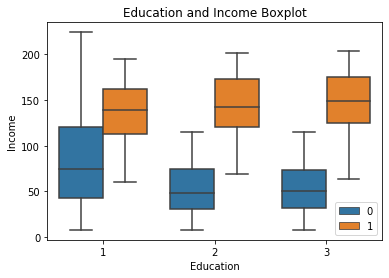

In [379]:
sns.boxplot(x='Education',data=data1,hue='Personal Loan',y='Income')
plt.legend(loc='lower right')
plt.title("Education and Income Boxplot")

Text(0.5, 1.0, 'Education and Income Boxplot')

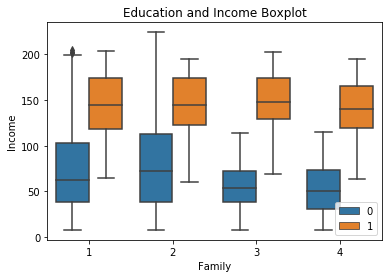

In [380]:
sns.boxplot(x='Family',data=data1,hue='Personal Loan',y='Income')
plt.legend(loc='lower right')
plt.title("Education and Income Boxplot")

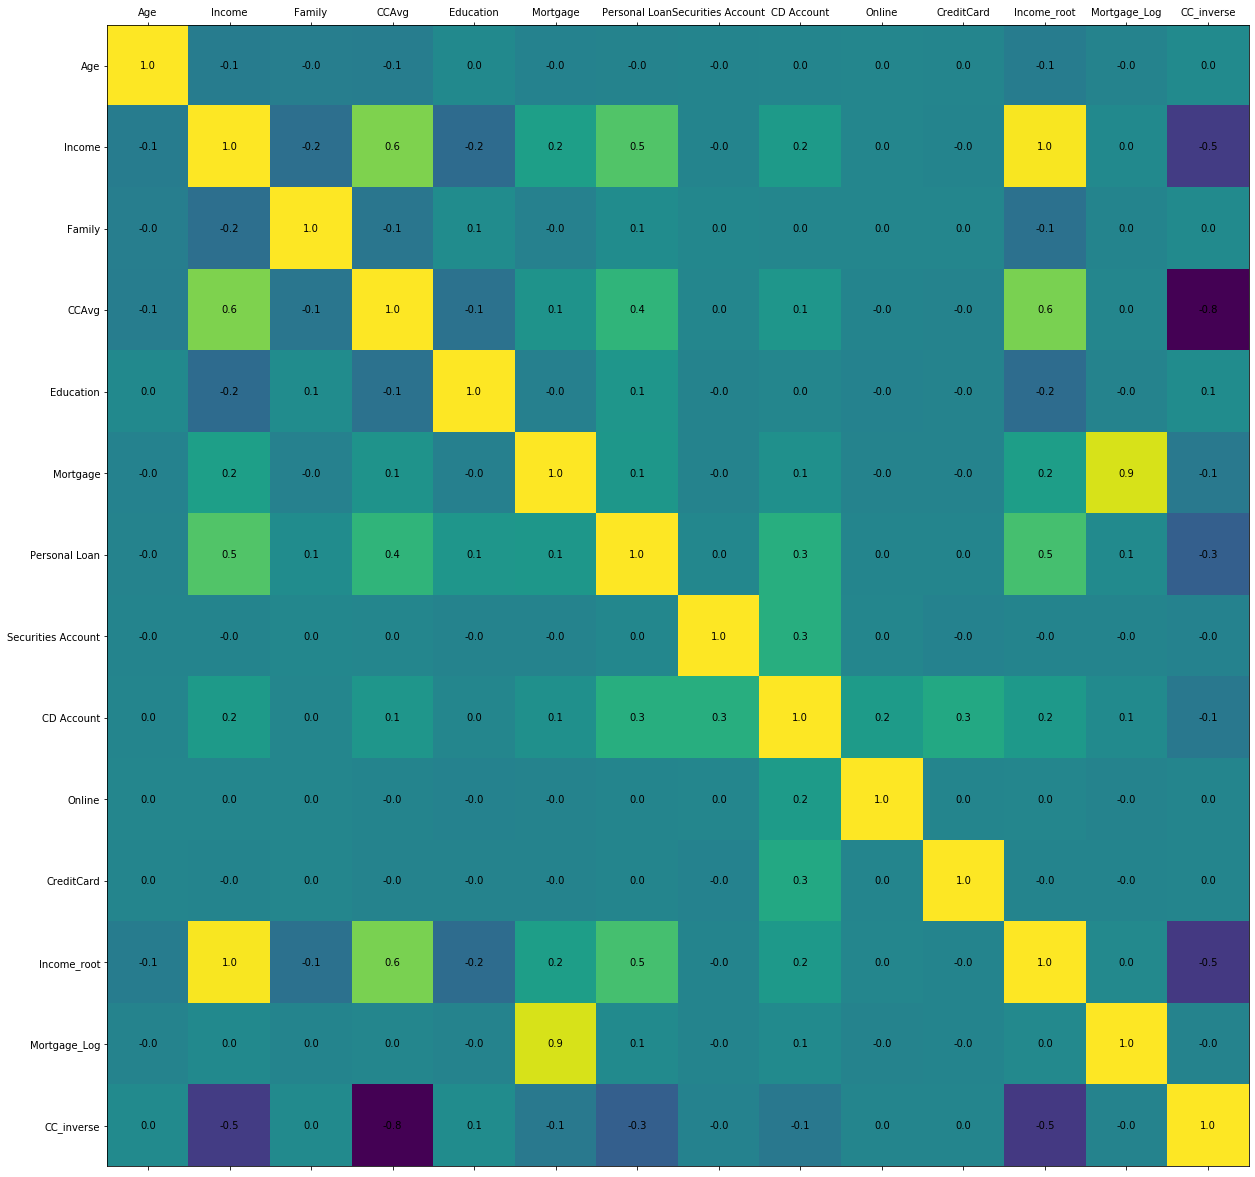

In [381]:
plot_corr(data1)

### Preparing the dataset for Model

In [383]:
data1

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_root,Mortgage_Log,CC_inverse
0,25,49,4,1.6,1,0,0,1,0,0,0,7.000000,0.000000,0.384615
1,45,34,3,1.5,1,0,0,1,0,0,0,5.830952,0.000000,0.400000
2,39,11,1,1.0,1,0,0,0,0,0,0,3.316625,0.000000,0.500000
3,35,100,1,2.7,2,0,0,0,0,0,0,10.000000,0.000000,0.270270
4,35,45,4,1.0,2,0,0,0,0,0,1,6.708204,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0,6.324555,0.000000,0.344828
4996,30,15,4,0.4,1,85,0,0,0,1,0,3.872983,4.454347,0.714286
4997,63,24,2,0.3,3,0,0,0,0,0,0,4.898979,0.000000,0.769231
4998,65,49,3,0.5,2,0,0,0,0,1,0,7.000000,0.000000,0.666667


In [384]:
## Define X and Y variables and droping multicolinear columns
X = data1.drop(['Personal Loan','Income','Mortgage','CCAvg'] ,axis=1)
Y = data1[['Personal Loan']]

In [386]:
X['Family'] = X['Family'].astype('category')
X['Education'] = X['Education'].astype('category')

In [387]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [388]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Securities Account  5000 non-null   int64  
 2   CD Account          5000 non-null   int64  
 3   Online              5000 non-null   int64  
 4   CreditCard          5000 non-null   int64  
 5   Income_root         5000 non-null   float64
 6   Mortgage_Log        5000 non-null   float64
 7   CC_inverse          5000 non-null   float64
 8   Family_2            5000 non-null   uint8  
 9   Family_3            5000 non-null   uint8  
 10  Family_4            5000 non-null   uint8  
 11  Education_2         5000 non-null   uint8  
 12  Education_3         5000 non-null   uint8  
dtypes: float64(3), int64(5), uint8(5)
memory usage: 337.0 KB


In [389]:
X

,Age,Securities Account,CD Account,Online,CreditCard,Income_root,Mortgage_Log,CC_inverse,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,1,0,0,0,7.000000,0.000000,0.384615,0,0,1,0,0
1,45,1,0,0,0,5.830952,0.000000,0.400000,0,1,0,0,0
2,39,0,0,0,0,3.316625,0.000000,0.500000,0,0,0,0,0
3,35,0,0,0,0,10.000000,0.000000,0.270270,0,0,0,1,0
4,35,0,0,0,1,6.708204,0.000000,0.500000,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,0,0,1,0,6.324555,0.000000,0.344828,0,0,0,0,1
4996,30,0,0,1,0,3.872983,4.454347,0.714286,0,0,1,0,0
4997,63,0,0,0,0,4.898979,0.000000,0.769231,1,0,0,0,1
4998,65,0,0,1,0,7.000000,0.000000,0.666667,0,1,0,1,0


## 3.Split the data into training and test set in the ratio of 70:30 respectively 

In [390]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [391]:
##Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

### 4.Use  Logistic  Regressionmodel  to  predict whether the customer will  take  personal  loan  or not. Print all the metrics related for evaluating the model performance

In [404]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [405]:
y_predict = logreg.predict(X_test)

In [406]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Loan", "No Loan"] , yticklabels = ["Loan", "No Loan"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [407]:
print("\n\n Classification Report:\n ", classification_report(y_test,y_predict))
print("\n\n Accuracy Score: \n", accuracy_score(y_test,y_predict))
print("\n\n\n Confusion Matrix : \n" ,confusion_matrix(y_test,y_predict))



 Classification Report:
                precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.61      0.73       149

    accuracy                           0.96      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.96      0.95      1500



 Accuracy Score: 
 0.9553333333333334



 Confusion Matrix : 
 [[1342    9]
 [  58   91]]


Trainig accuracy 0.9625714285714285

Testing accuracy 0.9553333333333334

Confusion Matrix


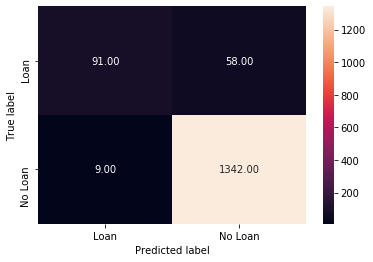

None

Recall: 0.610738255033557

Precision: 0.91

F1 Score: 0.7309236947791165

Roc Auc Score: 0.8020382614916121


In [408]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


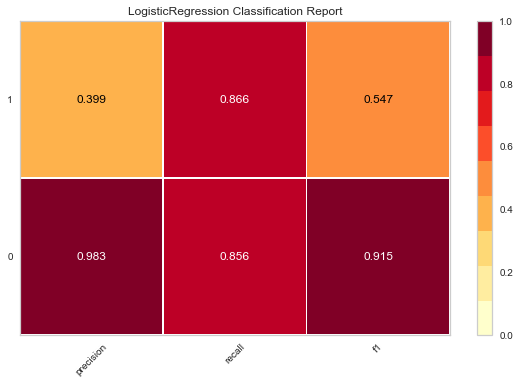

C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


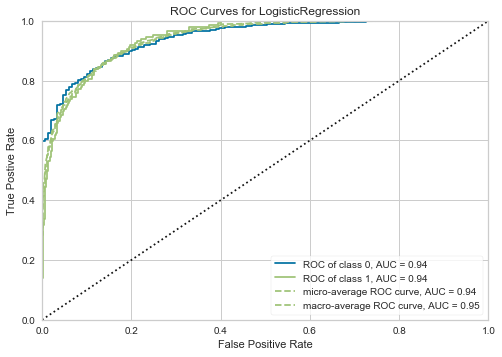

In [409]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

# 5.Give your reasoning on how can the model perform better? (10 marks)Hint:Check parameter6.Give Business understanding of your model? (5 marks)


#### All solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

In [397]:
# Running a loop to check different values of 'solver'


train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2',solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.965, 0.963, 0.961, 0.945, 0.935]

[0.96, 0.955, 0.952, 0.935, 0.923]


C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [398]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1',solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['liblinear', 'saga']

[0.965, 0.935]

[0.96, 0.923]


C:\Users\16099\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### Finding the best C value

In [399]:

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.904, 0.958, 0.964, 0.965, 0.965, 0.965]

[0.899, 0.947, 0.955, 0.959, 0.96, 0.96]


C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [400]:
## Solver liblinear penalty l2 c = 0.5 , 0.75,1
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', solver='liblinear', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.914, 0.94, 0.954, 0.958, 0.96, 0.961]

[0.902, 0.932, 0.943, 0.949, 0.951, 0.952]


C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [401]:
#Solver 'lbfgs' penalty l2 c = 0.5 , 0.75,1
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', solver='lbfgs', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.929, 0.957, 0.961, 0.963, 0.964, 0.963]

[0.925, 0.947, 0.951, 0.95, 0.957, 0.955]


C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [402]:
## changes in class weight  reduce the performance of the model hence go with default value 
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i,class_weight='balanced')  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\16099\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.911, 0.911, 0.907, 0.888, 0.87]

[0.91, 0.91, 0.896, 0.88, 0.857]


C:\Users\16099\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


these models give better results keeping class_weight as default chaging class weight reduce the score 
- Solver liblinear penalty l1 c = 0.5 , 0.75,1
- Solver 'lbfgs' penalty l2 c = 0.5 , 0.75,1
- Solver 'lbfgs' penalty l1 c = 0.5 , 0.75,1



# 6.Give Business understanding of your model? 